# Edge Detector

### imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### main variables

In [9]:
image_path = '../images/butterfly.jpg'

### functions

In [3]:
#Source: https://stackoverflow.com/a/42314798

def plotimage(img, title=None, figsize=None):
    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])    
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

### read image

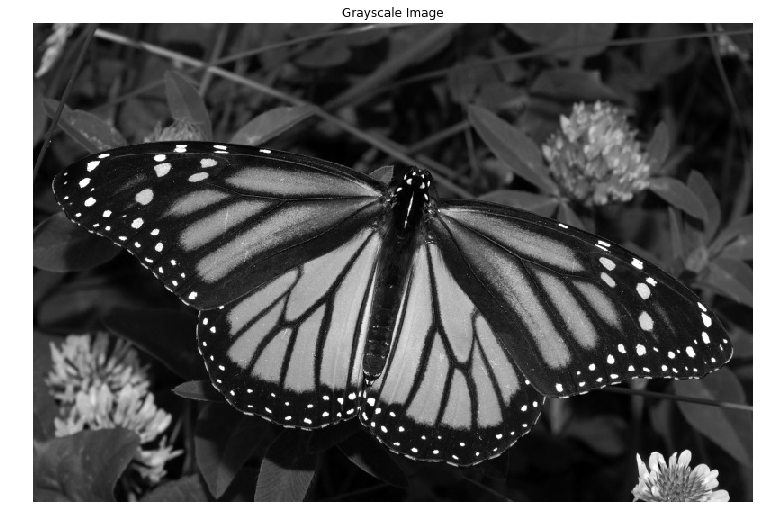

In [10]:
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plotimage(gray, 'Grayscale Image')

In [11]:
class Operator:
    def __init__(self, kernel, center=None):
        if type(kernel) is np.ndarray:
            kernel = np.asarray(kernel)
        if len(kernel.shape)!=2:
            raise Exception("Opeartor should be a 2D array")
        self.kernel = kernel
        
        if center is None:
            center = ((kernel.shape[0]-1)//2, (kernel.shape[1]-1)//2)
        self.center = center
        
        
    def __repr__(self):
        return "kernel: {} | center: {}".format(self.kernel, self.center).replace("\n"," ")
    
    def width(self):
        return self.kernel.shape[0]
    
    def height(self):
        return self.kernel.shape[1]
    
    def center_to_bottom_right(self):
        return center_to_right() , center_to_bottom()
    
    def center_to_right(self):
        return self.width() - 1 - self.center[0]
    
    def center_to_bottom(self):
        return self.height() - 1 - self.center[1]
    
    def apply_operator(self, gray):
        imwidth = gray.shape[0]
        imheight = gray.shape[1]

        result = np.zeros_like(gray, dtype='int')
        for i in range(self.center[0],imwidth-self.center_to_right()):
            for j in range(self.center[1],imheight-self.center_to_bottom()):
                result[i,j] = np.sum(self.kernel*gray[i-self.center[0]:i+self.center_to_right()+1,j-self.center[1]:j+self.center_to_bottom()+1])
        
        return result

        

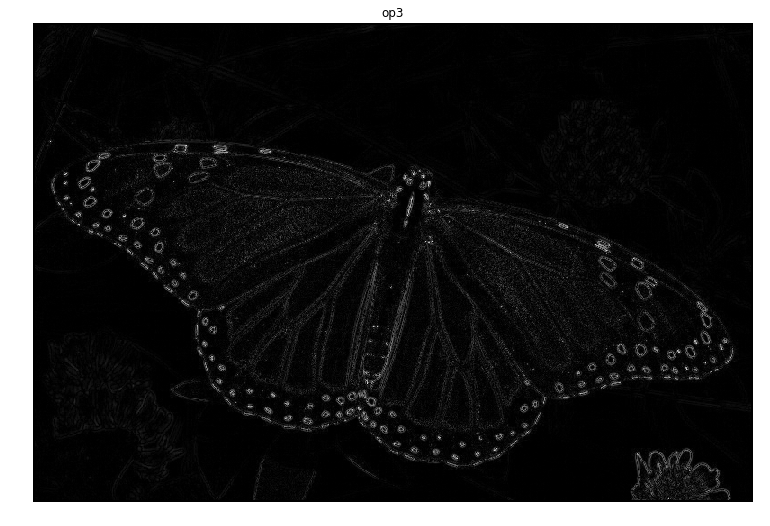

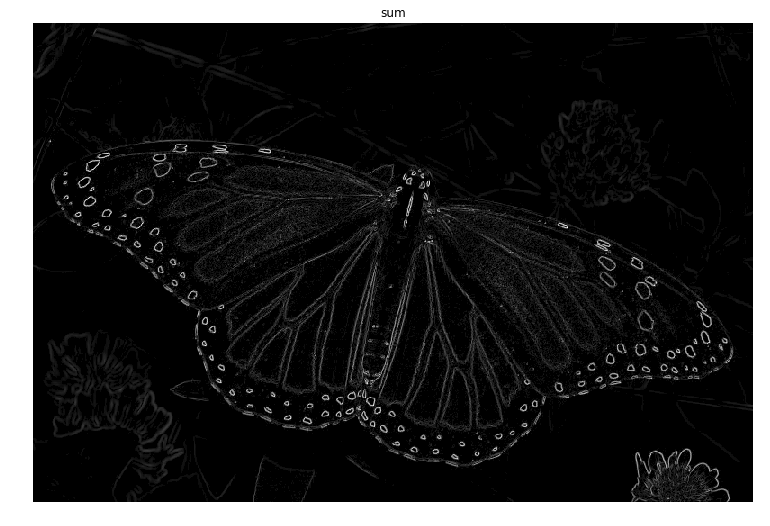

array([[ 0, -1, -2, ...,  0,  0,  0],
       [ 0, -1,  0, ...,  0, -1,  0],
       [ 1,  0,  0, ...,  0, -1,  0],
       ...,
       [-2, -4, -5, ...,  0, -1,  0],
       [-2, -2, -3, ...,  0,  0,  0],
       [ 0,  0, -1, ...,  1,  0,  0]])

In [23]:
# operator1 = Operator(np.array([
#     [0, 1,0],
#     [1,-4,1],
#     [0, 1,0]
# ]))

# operator2 = Operator(np.array([
#     [1, 1,1],
#     [1,-8,1],
#     [1, 1,1]
# ]))

operator1 = Operator(np.array([
    [1, -1],
]))

operator2 = Operator(np.array([
    [ 1],
    [-1]
]))

# operator1 = Operator(np.array([
#     [1, 1, 1],
#     [0, 0, 0],
#     [-1,-1,-1]
# ]))

# operator2 = Operator(np.array([
#     [-1, 0, 1],
#     [-1, 0, 1],
#     [-1, 0, 1]
# ]))

# operator3 = Operator(np.array([
#     [ 0, 1, 1],
#     [-1, 0, 1],
#     [-1,-1, 0]
# ]))

operator3 = Operator(np.array([
    [ 0, 0,-1, 0, 0],
    [ 0,-1,-2,-1, 0],
    [-1,-2,16,-2,-1],
    [ 0,-1,-2,-1, 0],
    [ 0, 0,-1, 0, 0],
]))


res1=operator1.apply_operator(gray)
res2=operator2.apply_operator(gray)
res3=operator3.apply_operator(gray)

# thresh = 0
# res1[res1<=thresh]=0
# res2[res2<=thresh]=0
# res3[res3<=thresh]=0

res = np.sqrt(res1*res1+res2*res2)
thresh=10
res[res<thresh] = 0

plotimage(np.abs(res3), 'op3')
# plotimage((res2), 'op2',(5,5))
plotimage(res, 'sum')
res1
